<a href="https://colab.research.google.com/github/sethkipsangmutuba/Matplotlib/blob/main/a6_Histograms_and_Binnings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histograms, Binnings, and Density

Histograms are a quick way to understand data distributions. Matplotlib’s `plt.hist` creates them easily with one line after standard plotting imports.


In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # or another style from plt.style.available

rng = np.random.default_rng(seed=1701)
data = rng.normal(loc=0, scale=1, size=1000)


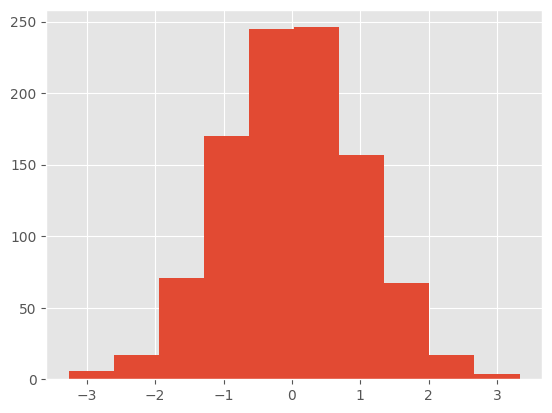

In [52]:
plt.hist(data);

The `hist` function has many options to tune both the calculation and the display;
here's an example of a more customized histogram, shown in the following figure:

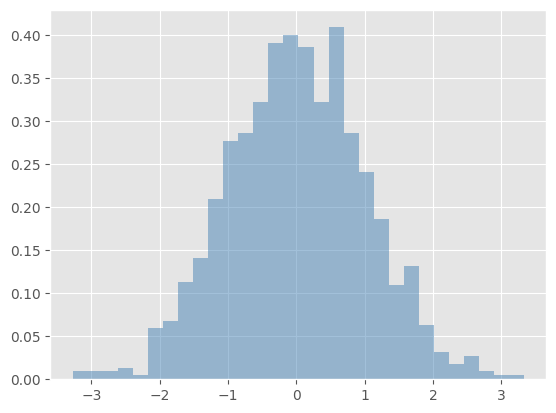

In [53]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         color='steelblue', edgecolor=None,
         histtype='stepfilled');


### Customizing Histograms for Comparison

Use `histtype='stepfilled'` with `alpha` for transparency—great for overlaying and comparing multiple distributions. See `plt.hist` docstring for more customization options.


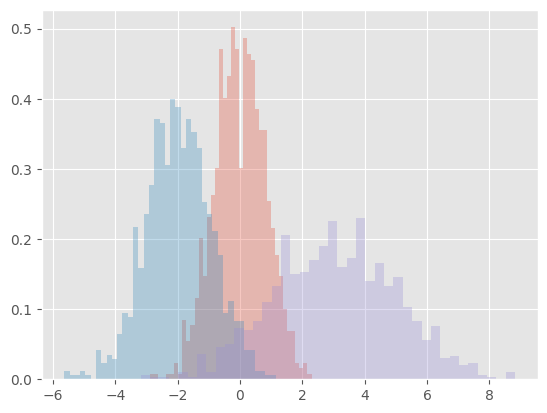

In [54]:
data = [
    rng.normal(loc=0, scale=0.8, size=1000),
    rng.normal(loc=-2, scale=1.0, size=1000),
    rng.normal(loc=3, scale=2.0, size=1000)
]

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

for x in data:
    plt.hist(x, **kwargs)


### Computing Histograms Without Plotting

Use `np.histogram` to count data in bins without displaying.


In [55]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 228 1391  889  426   66]


### Two-Dimensional Histograms

2D histograms bin data across two axes, showing joint distributions. Like 1D histograms, they group values—here using both `x` and `y` from a multivariate Gaussian.


In [56]:
mean = [0, 0]
covariance = [[1, 1], [1, 2]]
x, y = np.random.default_rng(42).multivariate_normal(mean, covariance, 10_000).T


### `plt.hist2d`: Simple 2D Histogram

Matplotlib’s `plt.hist2d` offers an easy way to visualize 2D histograms, showing density by color intensity across two variables.


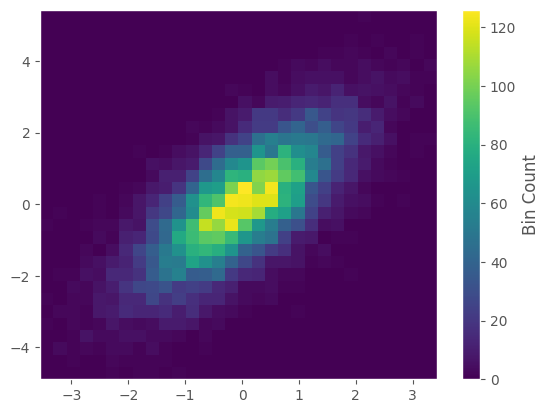

In [57]:
plt.hist2d(x, y, bins=30, cmap='viridis')
plt.colorbar(label='Bin Count')


### Fine-Tuning 2D Histograms

`plt.hist2d` offers customization like `plt.hist`. For raw bin counts without plotting, use the equivalent NumPy function: `np.histogram2d`.


In [58]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
print(counts.shape)


(30, 30)


For the generalization of this histogram binning when there are more than two dimensions, see the `np.histogramdd` function.

### `plt.hexbin`: Hexagonal Binning

Unlike square bins in 2D histograms, `plt.hexbin` uses hexagonal bins—often better for density visualization, reducing overlap and revealing structure in dense scatter data.


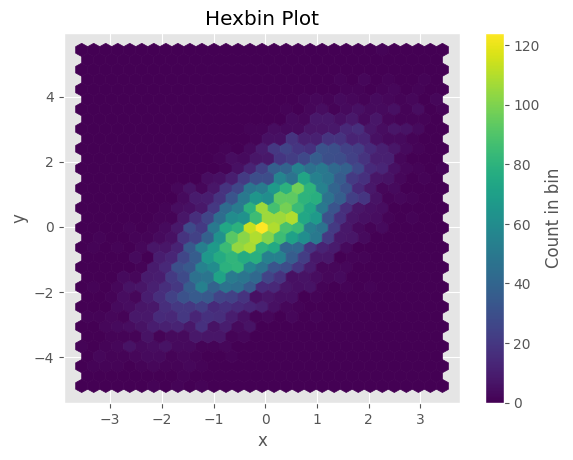

In [59]:
plt.hexbin(x, y, gridsize=30, cmap='viridis')
plt.colorbar(label='Count in bin')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hexbin Plot')
plt.show()


### Advanced Options in `plt.hexbin`

`plt.hexbin` supports weighted data and custom NumPy aggregates like mean or standard deviation, offering flexible control over bin value calculations.


### Kernel Density Estimation (KDE)

KDE smooths point data into continuous density estimates. `scipy.stats.gaussian_kde` offers a quick way to compute and visualize KDE from scattered samples.


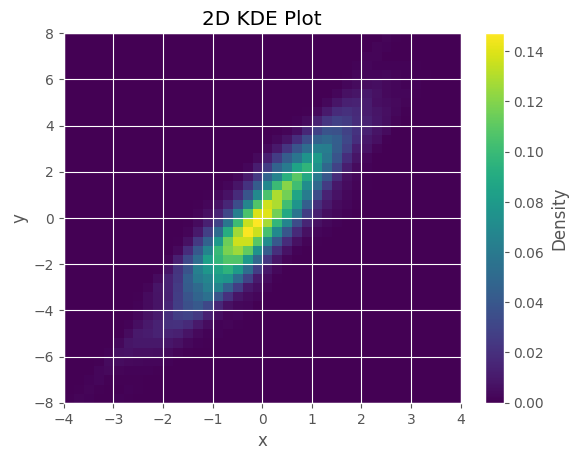

In [60]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

# Sample data
rng = np.random.default_rng(0)
x = rng.normal(size=1000)
y = 2 * x + rng.normal(size=1000)

# Fit KDE
data = np.vstack([x, y])
kde = gaussian_kde(data)

# Evaluate on a grid
xgrid = np.linspace(-4, 4, 40)
ygrid = np.linspace(-8, 8, 40)
X, Y = np.meshgrid(xgrid, ygrid)
Z = kde(np.vstack([X.ravel(), Y.ravel()]))

# Plot
plt.imshow(Z.reshape(X.shape), origin='lower', aspect='auto',
           extent=[xgrid.min(), xgrid.max(), ygrid.min(), ygrid.max()],
           cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D KDE Plot')
plt.show()


### KDE Smoothing and Alternatives

KDE smoothing balances detail and generalization. `gaussian_kde` uses a heuristic bandwidth. Alternatives include `sklearn` and `statsmodels`, while Seaborn simplifies KDE plotting with cleaner syntax.
